In [1]:
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Iris Data set #

In [2]:
df = pd.read_csv('iris-id.csv')
df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
77,6.7,3.0,5.0,1.7,versicolor,2
1,4.9,3.0,1.4,0.2,setosa,1
122,7.7,2.8,6.7,2.0,virginica,3
30,4.8,3.1,1.6,0.2,setosa,1
88,5.6,3.0,4.1,1.3,versicolor,2
46,5.1,3.8,1.6,0.2,setosa,1
100,6.3,3.3,6.0,2.5,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
128,6.4,2.8,5.6,2.1,virginica,3
15,5.7,4.4,1.5,0.4,setosa,1


Cargamos el dataset de iris, un dataset que nos da la informacion de las mediciones de cuatro caracteristicas de tres diferentes especies de la flor iris, los datos estan en valores de centimetros midiendo la longitud y ancho de sepalos y petalos. 

Contamos con los siguientes valores:

* sepal_length: Lonfitud del sepalo(Parte exterior de la flor) 
* sepal_width: Ancho del sepalo(Parte exterior de la flor)
* petal_length: Longitud del petalo(Parte colorida de la flor)
* petal_width: Ancho del petalo(Parte colorida de la flor)
* species: Especie de la flor (Virginica, versicolor, setosa)
* species_id: Version Codificada de la especie

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Verificamos la cantidad de datos que tenemos en el dataset, tenemos 150 filas sin datos faltantes, vemos cuatro variables numericas continuas ya que estan dentro de un intervalo de medición de los sepalos y petalos, tambien una variable numerica dicreta ya que sirve para conteo, tambien una variable categorica nominal ya que no se evidencia jerarquia o orden.

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


Sacamos la estadistica descritiva, vemos que el rango de longitud de sepalo esta entre 4.3cm y 7.9 cm, mientras el ancho esta entre 2cm y 4.40cm , el rango de la longitud de petalo esta entre 1cm y 6.9cm mientra en ancho del petalo esta en un rango de 0.1cm y 2.5 cm

In [5]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Tenemos 50 flores por especie en el dataset

In [6]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_id
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_id,0.782561,-0.419446,0.949043,0.956464,1.000000


sacamos la correlación que hay entre las variables, vemos una correlación negativa entre la longitud y la anchura del pelato, esto significa que mientras una variable tiende a crecer, la otra tiende a disminuir.

Diferente entre la correlación que tiene las variables de longitud y anchura del petalo que es una correlación positiva, esto significa que ambas crecen en un mismo sentido 

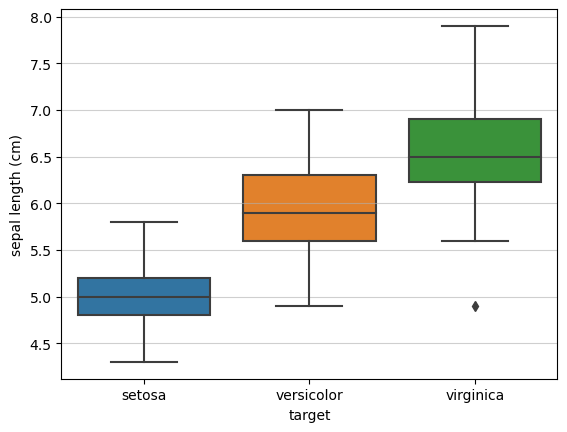

In [7]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.ylabel("sepal length (cm)")
plt.xlabel("target")
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.show()

sacamos una grafica de boxplot de las longitudes del sepalo con las medianas.

* Las medianas de la longitud del sépalo para las variedades Versicolor y Virginica son iguales.

Vemos que las medianas de las especie versicolor y virginica no son iguales, la mediana de la especie versicolor es de 5.9, mientras que la mediana de la especie virginica es de 6.5, tambien vemos que la mediana de la especie setosa esta en 5.0. 

En el grafico tambien vemos un outlier en la especie virginica, esto significa que hay un valor atipico fuera del rango esperado.


In [8]:
df.groupby('species')['sepal_length'].median()

species
setosa        5.0
versicolor    5.9
virginica     6.5
Name: sepal_length, dtype: float64

sacamos una serie con las medianas de la longitud del sepalo de las tres especies para corroborar nuestras respuestas evidenciando lo antes dicho, que las medianas de versicolor y virgina no son iguales

* Todos los elementos de la variedad Setosa tienen una longitud del sépalo inferior a la de cualquier elemento de la variedad Virginica

Lo que evidenciamos en la grafica es que no es asi en este caso, setosa tiene valores entre 4.3cm y 5.8cm, mientras virginica tiene valores entre 5.3cm y 7.9cm, pero como lo mencionamos antes, virginica tiene un valor atipico, un outlier por debajo de 5.0cm, esto nos indica que hay por lo menos un valor de virginica que es menor a algunos valores de setosa 


In [9]:
df[df['species'] == 'setosa']['sepal_length'].max()

5.8

In [10]:
df[df['species'] == 'virginica']['sepal_length'].min()

4.9

Sacamos el maximo de setosa y el minimo de  virginica y evidenciamos lo antes expuesto 

* Todos los elementos de la variedad Setosa tienen una longitud del sépalo inferior a la de cualquier elemento de la variedad Virginica

Esto es correcto, ya que el valor maximo de setosa es de 5.8cm como se ve en el grafico y en el codigo anterior, pero el valor maximo de virginica es de 7.9cm 

* El mínimo valor de longitud del sépalo de la variedad Virginica es más de medio centímetro más largo que el mínimo valor de la longitud del sépalo para la variedad Versicolor.

Realmente ambas especies de la flor tienen el mismo valor minimo, en la grafica evidenciamos que el outlier esta situado en el mismo punto de la grafica que el valor minimo de versicolor.

In [11]:
df[df['species'] == 'versicolor']['sepal_length'].min()

4.9

Calculamos el valor minimo de versicolor y evidenciamos que ambos son de 4.9cm

* Podemos asegurar que el 75% de los elementos de la variedad Virginica tienen una longitud del sépalo superior a la de cualquier elemento de la variedad Setosa.

Si, podemos asegurarlo y esto es debido a que la parte inferior de la caja representa el primer cuartil(Q1), es decir el 25% de los datos, por tanto el porcentaje faltantes, es decir el 75% de los elementos esta por encima de la longitud de setosa 

In [12]:
df[df['species'] == 'setosa']['sepal_length'].max()

5.8

In [13]:
df[df['species'] == 'virginica']['sepal_length'].quantile(0.25)

6.225

Evidenciamos que el Q1 de virginica es mayor que el valor maximo de setosa confirmando que el 75% de los datos estan por encima 

* Solo el 40% de los elementos de la variedad Setosa tienen una longitud del sépalo mayor que el mínimo de la longitud del sépalo de la variedad Versicolor.

Realmente no, lo que se puede ver en la grafica es que mas del 40% de los elementos de setosa tienen una longitud del sepalo mayor que el minimo observado en versicolor 


In [14]:
min_versicolor = df[df['species'] == 'versicolor']['sepal_length'].min() #sacamos el minimo de versicolor 
setosa = df[df['species'] == 'setosa'] #guardamos solo los datos de setosa
conteo = (setosa['sepal_length'] > min_versicolor).sum() #contamos elementos de setosa  para ver si es mayor al min_versicolor 
total_setosa = setosa.shape[0] #guardamos el numero de filas que tiene solo setosa 
porcentaje = conteo / total_setosa * 100 #calculamos el porcentaje  de los elementos de setosa sonbre la long mayor de sepalo
porcentaje

60.0

Evidenciamos que realmente el 60% de los elementos de setosa tienen una longitud mayor que el minimo de la longitud del sepalo versicolor 

* Solo la variedad Virginica presenta un valor anómalo de la longitud del sépalo. 

Si, solo vemos en la grafica un outlier en la especie virginica, un valor fuera del rango esperado en el punto 4.9cm

In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


* ¿De cuántos elementos se compone el dataset?

El dataset se compone de 150 datos, 50 por cada especie 

* ¿Cuál es el rango intercuartílico de la longitud del pétalo?



In [16]:
q1 = df['petal_length'].quantile(0.25)
q3 = df['petal_length'].quantile(0.75)
rango = q3 - q1
rango

3.4999999999999996

El rango intercuartilico es de 3.49, esto es una medida de dispersión que representa la diferencia entre el tercer cuartil y el primer cuartil 

* Responde “Verdadero” o “Falso” justificando la respuesta: la media es siempre igual a la mediana 

**Falso**, la media es el promedio de todos los valores de cada variable, en este caso de la tabla son los valores de la fila **mean**, mientra la mediana es el valor central cuando los datos estan organizados, en este caso en nuestra tabla son los valores que estan en la fila de **50%**

* Responde “Verdadero” o “Falso” justificando la respuesta: la media es siempre superior a la mediana

**Falso**, la media no siempre es superior a la mediana, la relación entre la media y la mediana depende de la distribución de los datos, en nuestra tabla por ejemplo se ve que la media es por un poco superior a la mediana en los valores de las variables del sepalo, pero en las variables del petalo es lo contrario, la mediana es superior a la media

* ¿Cuál es la variable con menor desviación típica? ¿Cuál tiene menor desviación típica comparado con su media?

In [17]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

el valor con menor desviacion tipica es la variable **sepal_width** con un valor de 0.43, esto significa que los valores de sepal_width son mas "compactos" 

In [18]:
medias = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
coef_var = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std() / medias
coef_var

sepal_length    0.141711
sepal_width     0.141976
petal_length    0.469427
petal_width     0.636675
dtype: float64

la variable con menor desviación tipica comparado con su media es la variable sepal_length, esto significa que esta variable es la que tiene valores mas agrupados

* Responde “Verdadero” o “Falso” justificando la respuesta: como medida de dispersión de datos, a mayor rango de una variable, corresponde siempre mayor desviación típica.

Aunque rango y desviación típica son ambas medidas de dispersión, no siempre están relacionadas de forma directa o proporcional. Es posible que una variable tenga un rango mayor pero una desviación típica menor, dependiendo de cómo estén distribuidos los valores.

# California Housing Prices #

In [19]:
df_house= pd.read_csv('housing.csv') #cargamos el dataset 
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Traemos información del dataset, evidenciamos que tenemos 10 variables, 9 numericas continuas ya que no estan dentro de un rango definido y 1 categorica nominal ya que no tiene un orden o jerarquia.

En el dataset tenemos un total de 20640 datos y ademas tambien evidenciamos datos faltantes en la variable **total_bedrooms**

In [21]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Vemos que tenemos un faltante de 207 datos faltantes en la variable **total_bedrooms**

In [22]:
df_house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Traemos la correlación entre las columnas evidenciando correlación entre unas positivas, indicando que ambas columnas crecen en ambos sentidos, mientras tambien vemos algunos negativos mostrando que mientras una columna crece la otra disminuye 

In [23]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


calculamos minimos, maximos y percentiles

Text(0.5, 1.0, 'Distribución del Valor Medio de Vivienda')

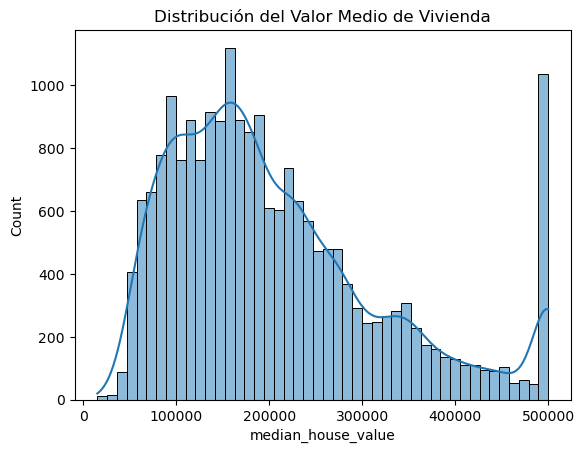

In [24]:
sns.histplot(df_house['median_house_value'], kde=True)
plt.title('Distribución del Valor Medio de Vivienda')

Sacamos un grafico donde podemos ver el precio promedio de las viviendas, vemos una gran cantidad de viviendas con promedio de precios entre entre los 100000 y los 200000, tambien en los 500000

Text(0.5, 1.0, 'Distribución Geográfica de los Precios de Vivienda')

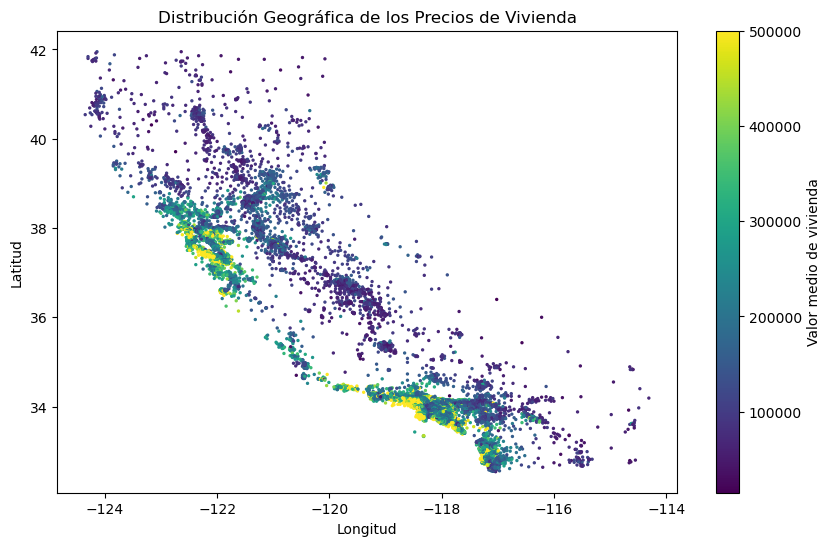

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df_house['longitude'], df_house['latitude'], 
            c=df_house['median_house_value'], cmap='viridis', s=2)
plt.colorbar(label='Valor medio de vivienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de los Precios de Vivienda')

Teniendo las variables de latitud y longitud podemos ver la ubicación de las viviendas, y poder ver la distribución por el promedio de precio por vivienda

* Elimina la variable “ocean_proximity” de df_house. Elimina las instancias que contengan valores faltantes

In [26]:
df_house = df_house.drop(columns=['ocean_proximity'])

Eliminamos la columna **ocean_proximity** ya que no vamos a trabajar con ella

In [27]:
df_house = df_house.dropna()

In [28]:
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Eliminamos los registros con datos faltantes y evidenciamos que ya tenemos un dataset sin datos nulos, pasamos de un dataset de 2640 registros a 20433, se eliminaron 207 filas, menos del 1% de datos para el analisis 

* Crea un array de nombre y_house con los valores de la variable “median_house_value”

In [1]:
y_house = df_house['median_house_value'].to_numpy() #se crea el array con la variable 'median_house_value'
y_house

NameError: name 'df_house' is not defined

* Elimina la variable “median_house_value” del DataFrame df_house.

In [30]:
df_house = df_house.drop(columns=['median_house_value'])
df_house.sample(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16052,-122.48,37.76,50.0,2236.0,484.0,1171.0,467.0,4.0977


* Utiliza el método describe() de Pandas para obtener un resumen de las estadísticas de las variables del DataFrame df_house. En base a los valores de mediana, percentil 25 y percentil 75, ¿qué variables crees que siguen una distribución distinta a la distribución normal?

In [31]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


Para que una variable siga una **distribución normal** debe haber una asimetria en sus valores, usando los porcentiles (25%, 50%, 75%) y su relacion con la media, para ver si una variable tiene una distribución normal debe cumplir con lo siguiente:

* Media = Mediana
* Porcentiles simetricos (distancia similar del 25% a la mediana y de la mediana al 75%)

**Longitude y Latitude**

mediana cerca a la media y porcentiles casi simetricos

**housing_median_age**

media cerca a la mediana y porcentiles casi simetricos

**total_rooms, Population, households, demian_income**

En estas variables notamos que la media esta por encima de la mediana y la diferencia entre los porcentiles no es simétrica 

* Dibuja los histogramas de cada una de las variables del dataset. ¿Coincide la predicción que has hecho basada en los percentiles con los resultados gráficos que has obtenido con los histogramas?

In [32]:
columnas = df_house.select_dtypes(include=['float64']).columns #guardamos las columnas para crear los graficos

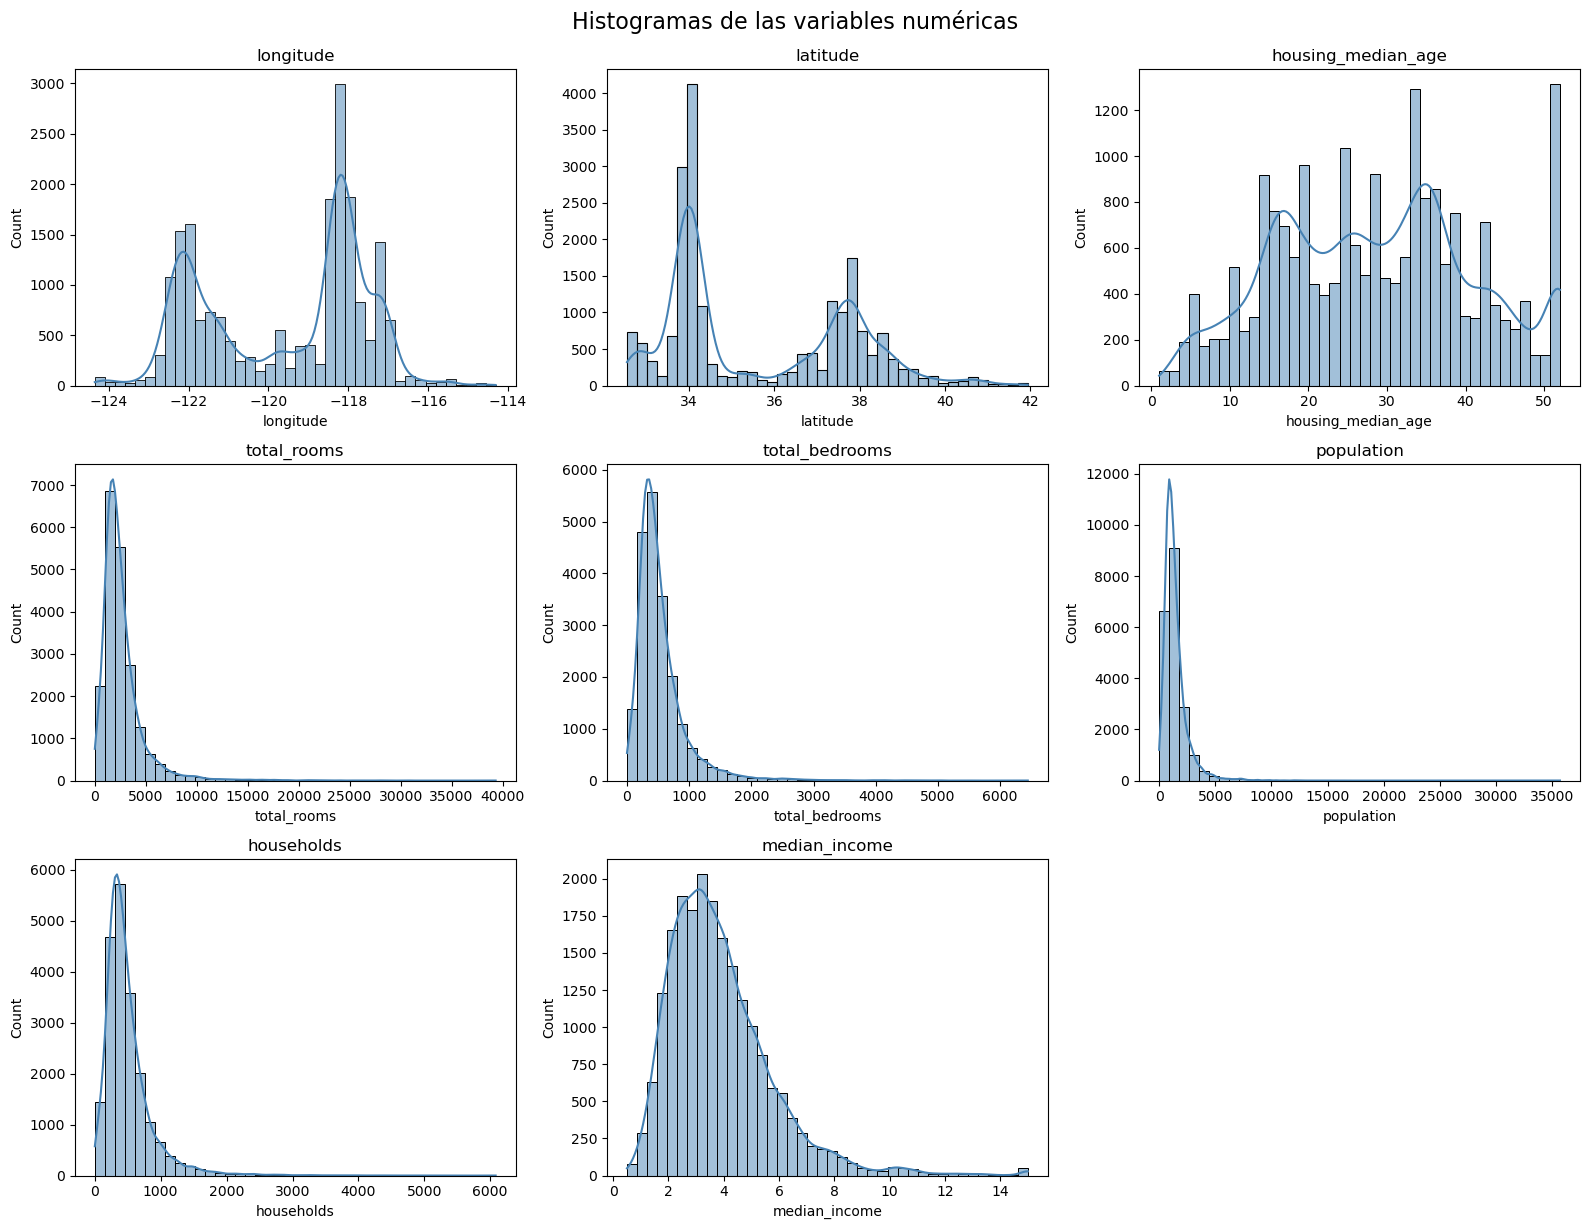

In [33]:
plt.figure(figsize=(16, 12))

# Creamos un histograma por cada variable
for i, col in enumerate(columnas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_house[col], bins=40, kde=True, color='steelblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Histogramas de las variables numéricas", y=1.02, fontsize=16)
plt.show()

vemos que las variables **total_rooms, total_bedrooms, population, households, median_income** tienen un sesgo positivo (colas a la derecha) confirmando que en estas variables la media esta por encima de la mediana.

las variables **Longitude y Latitude** se evidencia distribuciones por regiones, esto se espera por la geografia 

la variable **housing_median_age** distribución con picos en ciertos valores, aunque no es normal, no esta tan sesgada.

* Algunos algoritmos de Machine Learning funcionan mejor cuando sus variables predictivas siguen una distribución normal. ¿Qué tipos de algoritmos crees que tienen este requerimiento?

Los algoritmos que mejor funcionan de Machine Learning con distribución normal son las que se basan en supuestos estadísticos.

* ***regresión lineal*** - Supone normalidad de errores
* ***LDA*** - Supone que las clases siguen distribuciones normales
* ***Logistic Regression*** - Mejor desempecho si las variables tienen distribución simétrica
* ***SVM(con kernel lineal o polinomico)*** -  Puede verse afectada con variables muy sesgadas
* ***KNN*** - La distancia puede verse distorsionada por distribuciones no normales o escalas diferentes

* ¿Qué tipo de transformaciones puedes aplicar a las variables de este dataset para que las variables nuevas sigan, aproximadamente, una distribución normal?

podemos usar las siguientes transformaciones que ayudan a las variables numericas mas simetricas.

* Logaritmica; es util para sesgos positivos(valores grandes y dispersos) - np.log1p(df['population'])
* Raíz cuadrada; Datos con conteos bajos y dispersos - np.sqrt(df['total_rooms'])
* Box-Cox; Solo para datos positivos - scipy.stats.boxcox()
* Yeo-Johnson; Acepta datos negativos - sklearn.preprocessing.PowerTransformer()
* Escalado estándar; Normalizar a media 0 y desviación estándar 1 - StandardScaler()



* Crea un DataFrame nuevo, llamado df_trans, donde las variables originales han sido transformadas de forma que cada una de ellas sigue, aproximadamente, una distribución normal. Elige, para cada variable, la transformación que mejor aproxime cada distribución a la distribución normal. Nombra las variables de df_trans como las variables del df original, añadiendo el sufijo “_trans”.

In [34]:
df_trans = pd.DataFrame() #creamos el dataframe df_trans

#Ingresamos las variables que no necesitan transformacion
df_trans['longitude_trans'] = df_house['longitude']
df_trans['latitude_trans'] = df_house['latitude']

#Aunque Housing_median_age aunque no esta tan sesgada, le haremos una pequeña transformacion con la transformacion raiz cuadrada
df_trans['housing_median_age_trans'] = np.sqrt(df_house['housing_median_age'])

#transformamos las variables que tienen mas sesgo positivo con la transformacion logaritmica
for col in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']:
    df_trans[col + '_trans'] = np.log1p(df_house[col])
    

In [35]:
df_trans.sample(3)

,longitude_trans,latitude_trans,housing_median_age_trans,total_rooms_trans,total_bedrooms_trans,population_trans,households_trans,median_income_trans
18243,-122.09,37.40,4.898979,8.290042,7.027315,7.880804,6.978214,1.542058
4611,-118.29,34.06,3.000000,7.349231,6.704414,7.441320,6.635947,1.104760
6375,-118.03,34.16,6.000000,7.403061,5.480639,6.542472,5.537334,2.039765


Creamos el dataframe df_trans ingresando las variables que no necesitan transformacion primero, aunque **housing_median_house** no estaba tan sesgada preferimos hacer una pequeña transformacion, las demas variables fueron transformadas a traves de un bucle for aplicando la transformacion logaritmica que es util para variables con valores grandes y sesgo positivo 

In [36]:
df_trans.describe()

,longitude_trans,latitude_trans,housing_median_age_trans,total_rooms_trans,total_bedrooms_trans,population_trans,households_trans,median_income_trans
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,5.198256,7.629543,6.054708,7.025121,5.984538,1.517119
std,2.003578,2.136348,1.269375,0.750260,0.726728,0.736336,0.726856,0.358647
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.405398
25%,-121.800000,33.930000,4.242641,7.280008,5.693732,6.669498,5.638355,1.270799
50%,-118.490000,34.260000,5.385165,7.662938,6.077642,7.062192,6.016157,1.512156
75%,-118.010000,37.720000,6.082763,8.053251,6.473891,7.451822,6.405228,1.748156
max,-114.310000,41.950000,7.211103,10.579514,8.771215,10.482430,8.713253,2.772595


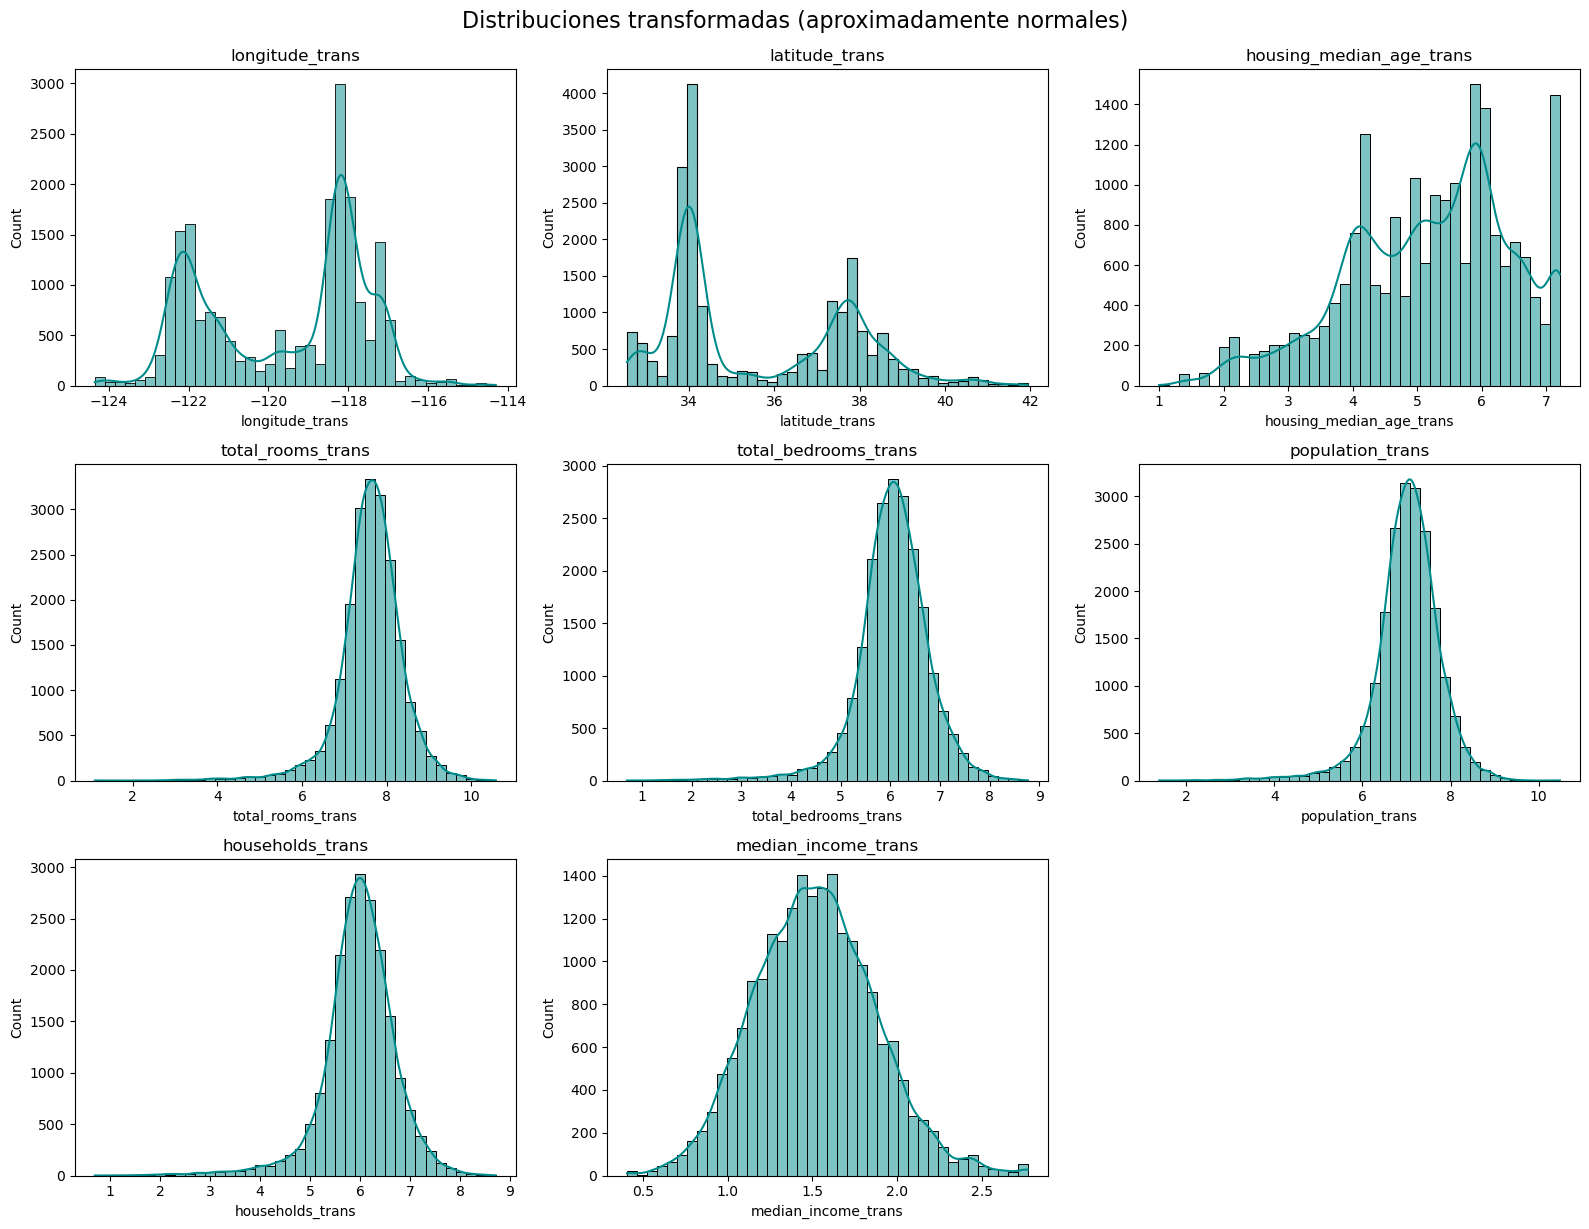

In [37]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_trans.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_trans[col], bins=40, kde=True, color='darkcyan')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distribuciones transformadas (aproximadamente normales)", y=1.02, fontsize=16)
plt.show()

Dibujamos nuevamente los histogramas de cada variable del dataframe df_trans, se evidencia una diferencia a los histogramas anteriores, mostrando que las variables ya se encuentran normalizados 

* Crea un nuevo array y_trans a partir del array y_house, de forma que los elementos de y_trans sigan, aproximadamente, una distribución normal. Utiliza la transformación más adecuada

In [38]:
y_trans = np.log1p(y_house)
y_trans

array([13.02276622, 12.78968673, 12.77167335, ..., 11.43281025,
       11.34688269, 11.40088715])

Realizamos la transformación logaritmica ya que comprime los valores grandes, reduciendo el sesgo, ayudando a normalizar los datos

* Utiliza la clase LocalOutlierFactor de Scikit Learn para declarar un objeto llamado lof. Crea cuatro arrays vacíos llamados rmse_house_orig, rmse_house_anom, rmse_trans_orig y rmse_trans_anom.

* Crea un bucle “for” de 10 iteraciones. En cada iteración del bucle deberán realizarse los siguientes pasos:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random

importamos las librerias con las que vamos a trabajar para el bucle for

In [40]:
#Crea el objeto LOF con los parametros por defecto
lof = LocalOutlierFactor()

#creamos los arrays vacios
rmse_house_orig = []
rmse_house_anom = []
rmse_trans_orig = []
rmse_trans_anom = []

Cramos el objeto llamado lof y los cuatro arrays vacios 

In [41]:
#creamos el bucle con las 10 iteraciones 
for i in range(10):
    #Generamos un numero aleatorio entre 1 y 1000
    n_rand = random.randint(1, 1000)
    
    #separamos los datos originales 
    df_house_train, df_house_test, y_house_train, y_house_test = train_test_split(
        df_house, y_house, test_size=0.3, random_state=n_rand
    )

    # Separamos los datos transformados
    df_trans_train, df_trans_test, y_trans_train, y_trans_test = train_test_split(
        df_trans, y_trans, test_size=0.3, random_state=n_rand
    )

    # Detectamos outliers en los datos originales
    anom_house = lof.fit_predict(df_house_train)
    mask_house = anom_house == 1  # 1 = normal, -1 = outlier
    df_house_train_anom = df_house_train[mask_house]
    y_house_train_anom = y_house_train[mask_house]

    # Detectamos outliers en los datos transformados
    anom_trans = lof.fit_predict(df_trans_train)
    mask_trans = anom_trans == 1
    df_trans_train_anom = df_trans_train[mask_trans]
    y_trans_train_anom = y_trans_train[mask_trans]

    # Creamos el modelo de regresión lineal
    linmod = LinearRegression()

    # 1. Modelo con datos originales (sin filtrar outliers)
    linmod.fit(df_house_train, y_house_train)
    y_house_pred = linmod.predict(df_house_test)
    rmse = np.sqrt(mean_squared_error(y_house_test, y_house_pred))
    rmse_house_orig.append(rmse)

    # 2. Modelo con datos originales filtrando outliers
    linmod.fit(df_house_train_anom, y_house_train_anom)
    y_house_anom_pred = linmod.predict(df_house_test)
    rmse = np.sqrt(mean_squared_error(y_house_test, y_house_anom_pred))
    rmse_house_anom.append(rmse)

    # 3. Modelo con datos transformados (sin filtrar outliers)
    linmod.fit(df_trans_train, y_trans_train)
    y_trans_pred = linmod.predict(df_trans_test)
    rmse = np.sqrt(mean_squared_error(y_trans_test, y_trans_pred))
    rmse_trans_orig.append(rmse)

    # 4. Modelo con datos transformados filtrando outliers
    linmod.fit(df_trans_train_anom, y_trans_train_anom)
    y_trans_anom_pred = linmod.predict(df_trans_test)
    rmse = np.sqrt(mean_squared_error(y_trans_test, y_trans_anom_pred))
    rmse_trans_anom.append(rmse)


Creamos un bucle for con 10 iteraciones en las cuales se realizan los siguientes pasos:

* genera un numero aleatorio de 1 a 1000
* Utiliza el método train_test_split sobre df_house e y_house para generar los DataFrames df_house_train, df_house_test, y_house_train, y_house_test. El tamaño del conjunto de test debe ser el 30% del tamaño del conjunto original. La semilla aleatoria “random_state” debe ser igual a n_rand.
* Utiliza el método train_test_split sobre df_trans e y_trans para generar los DataFrames df_trans_train, df_trans_test, y_trans_train, y_trans_test. El tamaño del conjunto de test debe ser el 30% del tamaño del conjunto original. La semilla aleatoria “random_state” debe ser igual a n_rand.
* Aplica el método fit_predict del objeto lof sobre df_house_train y define con ello un array llamado anom_house. Utiliza anom_house para crear una máscara que valga True para los elementos que no se consideran anomalías y False para los elementos que sí se consideran anomalías. Aplica esta máscara sobre df_house_train e y_house_train para definir un DataFrame df_house_train_anom y un array y_house_train_anom sin destruir ni modificar df_house_train ni y_house_train.
* Aplica el método fit_predict del objeto lof sobre df_trans_train y define con ello un array llamado anom_trans. Utiliza anom_trans para crear una máscara que valga True para los elementos que no se consideran anomalías y False para los elementos que sí se consideran anomalías. Aplica esta máscara sobre df_trans_train e y_trans_train para definir un DataFrame df_trans_train_anom y un array y_trans_train_anom sin destruir ni modificar df_trans_train ni y_trans_train
* Utiliza la clase LinearRegression de Scikit Learn para declarar un objetollamado linmod
* Entrena el objeto linmod utilizando df_house_train e y_house_train. Utiliza el método predict del objeto linmod sobre df_house_test creando con ello un array llamado y_house_pred. Utiliza la función mean_squared_error de Scikit Learn, usando como argumentos y_house_pred e y_house_test para obtener el mse. Calcula su raíz cuadrada para obtener su rmse. Añade este valor al array rmse_house_orig.
* Entrena el objeto linmod utilizando df_house_train_anom e y_house_train_anom. Utiliza el método predict del objeto linmod sobre df_house_test creando con ello un array llamado y_house_anom_pred. Utiliza la función mean_squared_error de Scikit Learn, usando como argumentos y_house_anom_pred e y_house_test para obtener el mse. Calcula su raíz cuadrada para obtener su rmse. Añade este valor al array rmse_house_anom.
* Entrena el objeto linmod utilizando df_trans_train e y_trans_train. Utiliza el método predict del objeto linmod sobre df_trans_test creando con ello un array llamado y_trans_pred. Utiliza la función mean_squared_error de Scikit Learn, usando como argumentos y_trans_pred e y_trans_test para obtener el mse. Calcula su raíz cuadrada para obtener su rmse. Añade este valor al array rmse_trans_orig.
* Entrena el objeto linmod utilizando df_trans_train_anom e y_trans_train_anom. Utiliza el método predict del objeto linmod sobre df_trans_test, creando con ello un array llamado y_trans_anom_pred. Utiliza la función mean_squared_error de Scikit Learn, usando como argumentos y_trans_anom_pred e y_trans_test para obtener el mse. Calcula su raíz cuadrada para obtener su rmse. Añade este valor al array rmse_trans_anom

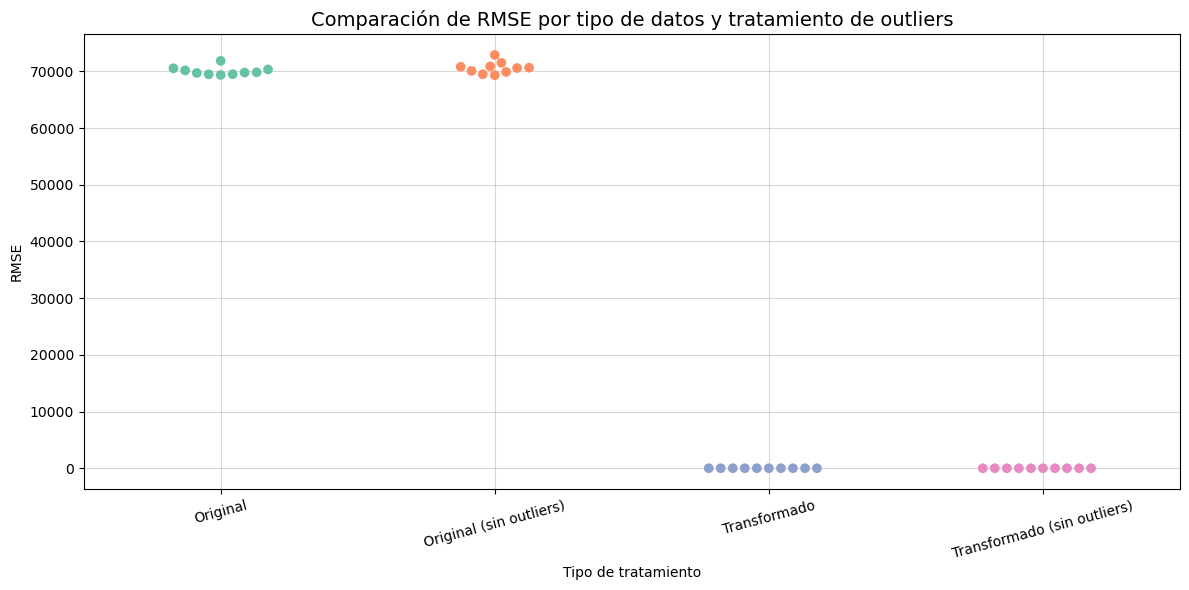

In [43]:
data_plot = pd.DataFrame({
    "RMSE": rmse_house_orig + rmse_house_anom + rmse_trans_orig + rmse_trans_anom,
    "Tipo": (["Original"] * 10) +
            (["Original (sin outliers)"] * 10) +
            (["Transformado"] * 10) +
            (["Transformado (sin outliers)"] * 10)
})

# Crear el gráfico de enjambre
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data_plot, x="Tipo", y="RMSE", palette="Set2", size=7)
plt.title("Comparación de RMSE por tipo de datos y tratamiento de outliers", fontsize=14)
plt.ylabel("RMSE")
plt.xlabel("Tipo de tratamiento")
plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

* Comparando rmse_house_orig y rmse_trans_orig, ¿se observa diferencia en el rendimiento de la regresión lineal al transformar los valores de sus variables para que sigan una distribución normal?

Si, la diferencia es grande ya que los puntos de rmse_house_origin estan alrededor de los 70000, mientras que los puntos de rmse_trans_orig estan cercanos al 0, esto ayuda al rendimiento del modelo de regresion lineal ya que este modelo funciona mejor cuando las variables independientes estan normalmente distribuidas y hay relaciones lineales  

 * Comparando rmse_trans_orig y rmse_trans_anom, ¿se observa diferencia en el rendimiento de la regresión lineal al haber eliminado las anomalías del conjunto de entrenamiento?
 
 En este caso no se observa una mejora significativa, los puntos de ambas variables estan cercanos y bajos, eliminar de por si los outliers no aporta una mejora notable en el rendimiento del modelo cuando las variables ya fueron transformadas adecuadamente. 